# Google Data Analytics TCC

## Caso de Estudo: Como um compartilhamento de bicicletas pode ter sucesso rápido?

### Importando bibliotecas

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import os
from datetime import datetime

### Extract

#### **Dataset**

In [98]:
base_url = 'https://divvy-tripdata.s3.amazonaws.com'

#### Função para obter os dados dos ultimos 12 meses

In [106]:
# Função para gerar os links dos últimos 12 meses, começando de 202502 até 202402
def get_last_12_months_files():
    # Data de início (fevereiro de 2025) e fim (fevereiro de 2024)
    start_year = 2025
    start_month = 2  # Fevereiro de 2025
    end_year = 2024
    end_month = 2  # Fevereiro de 2024

    # Lista para armazenar os arquivos
    files = []

    # Percorrendo os meses de fevereiro de 2025 até fevereiro de 2024
    current_year = start_year
    current_month = start_month

    while current_year >= end_year:
        # Criar o código de mês e ano
        year_month_code = f'{current_year}{str(current_month).zfill(2)}'
        files.append(f'https://divvy-tripdata.s3.amazonaws.com/{year_month_code}-divvy-tripdata.zip')

        # Decrementar o mês e ajustar o ano quando necessário
        current_month -= 1
        if current_month < 1:
            current_month = 12
            current_year -= 1

    return files

In [107]:
# Obter os arquivos dos últimos 12 meses
files_to_download = get_last_12_months_files()
print("Arquivos que serão baixados:")
for file_url in files_to_download:
    print(file_url)

Arquivos que serão baixados:
https://divvy-tripdata.s3.amazonaws.com/202502-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202501-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202412-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202411-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202410-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202409-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202408-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202407-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202406-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202405-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202404-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202403-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202402-divvy-tripdata.zip
https://divvy-tripdata.s3.amazonaws.com/202401-divvy-tripdata.zip


#### Extração Dados

In [108]:
# Função para baixar e descompactar os arquivos
def download_and_extract(files):
    for url in files:
        # Baixar o arquivo
        response = requests.get(url)
        zip_path = f'/content/{url.split("/")[-1]}'
        with open(zip_path, 'wb') as f:
            f.write(response.content)

        # Descompactar o arquivo
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall('/content/')

        # Verificar os arquivos extraídos
        extracted_files = os.listdir('/content/')
        print(f"Arquivos extraídos de {zip_path}: {extracted_files}")

# Baixar e descompactar os arquivos
download_and_extract(files_to_download)

Arquivos extraídos de /content/202502-divvy-tripdata.zip: ['.config', '202502-divvy-tripdata.csv', '__MACOSX', 'data', '202502-divvy-tripdata.zip', 'sample_data']
Arquivos extraídos de /content/202501-divvy-tripdata.zip: ['.config', '202501-divvy-tripdata.zip', '202502-divvy-tripdata.csv', '__MACOSX', 'data', '202501-divvy-tripdata.csv', '202502-divvy-tripdata.zip', 'sample_data']
Arquivos extraídos de /content/202412-divvy-tripdata.zip: ['.config', '202501-divvy-tripdata.zip', '202502-divvy-tripdata.csv', '__MACOSX', '202412-divvy-tripdata.zip', 'data', '202501-divvy-tripdata.csv', '202502-divvy-tripdata.zip', '202412-divvy-tripdata.csv', 'sample_data']
Arquivos extraídos de /content/202411-divvy-tripdata.zip: ['.config', '202501-divvy-tripdata.zip', '202502-divvy-tripdata.csv', '__MACOSX', '202411-divvy-tripdata.zip', '202412-divvy-tripdata.zip', 'data', '202411-divvy-tripdata.csv', '202501-divvy-tripdata.csv', '202502-divvy-tripdata.zip', '202412-divvy-tripdata.csv', 'sample_data']


#### Juntando dados

In [109]:
# Carregar os dados de todos os arquivos extraídos em um único DataFrame
extracted_files = os.listdir('/content/')
csv_files = [file for file in extracted_files if file.endswith('.csv')]

df_list = []
for csv_file in csv_files:
    file_path = f'/content/{csv_file}'
    df = pd.read_csv(file_path)
    df_list.append(df)

In [110]:
# Concatenar todos os DataFrames em um único
df = pd.concat(df_list, ignore_index=True)

Informações da DF

In [111]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A246CA24873F7C5C,classic_bike,2025-02-25 21:21:21.171,2025-02-25 21:30:09.941,Michigan Ave & Lake St,TA1305000011,Clark St & Elm St,TA1307000039,41.886022,-87.624398,41.902973,-87.631280,member
1,303C0906F3F068AE,classic_bike,2025-02-08 14:55:13.493,2025-02-08 15:13:39.890,Ogden Ave & Race Ave,13194,Clark St & Elm St,TA1307000039,41.891795,-87.658751,41.902973,-87.631280,member
2,A0F65F3531F1FB2B,electric_bike,2025-02-24 00:32:56.553,2025-02-24 00:38:21.711,Michigan Ave & Lake St,TA1305000011,Wabash Ave & 9th St,TA1309000010,41.886022,-87.624398,41.870769,-87.625734,casual
3,CE663C815B6A6D73,electric_bike,2025-02-07 17:00:38.646,2025-02-07 17:34:29.012,Ogden Ave & Race Ave,13194,Clark St & Elm St,TA1307000039,41.891795,-87.658751,41.902973,-87.631280,casual
4,43F626BEF919D026,classic_bike,2025-02-10 14:56:56.565,2025-02-10 15:01:18.745,Clark St & North Ave,13128,Clark St & Elm St,TA1307000039,41.911974,-87.631942,41.902973,-87.631280,member


### Transform

#### Limpeza

In [127]:
print("Verificando se há NaN ou Inf nas colunas:")
print(df.isna().sum())

Verificando se há NaN ou Inf nas colunas:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64


In [128]:
print("\nVerificando se há Inf nas colunas:")
print((df == np.inf).sum())


Verificando se há Inf nas colunas:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64


In [130]:
print("\nVerificando se há -Inf nas colunas:")
print((df == -np.inf).sum())


Verificando se há -Inf nas colunas:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64


In [114]:
def clean_data(df):
    print("Valores nulos antes da limpeza:")
    print(df.isnull().sum())

    df.dropna(inplace=True)
    # Pass `errors='coerce'` and `format='%Y-%m-%d %H:%M:%S'` to handle potential format issues
    df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
    df = df[df['ride_length'] > 0]
    df['day_of_week'] = df['started_at'].dt.day_name()

    print("Valores nulos após a limpeza:")
    print(df.isnull().sum())

    return df

In [115]:
df = clean_data(df)
print("Dados limpos!")

Valores nulos antes da limpeza:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


<ipython-input-114-5d01387bff93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['started_at'].dt.day_name()


Valores nulos após a limpeza:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64
Dados limpos!


#### Duração corrida


In [131]:
def calcular_duracao(inicio, fim):
    duracao = pd.to_datetime(fim, errors='coerce') - pd.to_datetime(inicio, errors='coerce')
    return duracao.dt.total_seconds() / 3600

In [133]:
df['ride_length'] = calcular_duracao(df['started_at'], df['ended_at'])

<ipython-input-133-d09700413bbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ride_length'] = calcular_duracao(df['started_at'], df['ended_at'])


#### Duração média por tipo de corrida

In [137]:
duracao_por_tipo = df.pivot_table(index='member_casual', values='ride_length', aggfunc='mean')

Duração média por dia da semana

In [139]:
duracao_por_dia = df.pivot_table(index='member_casual', columns='day_of_week', values='ride_length', aggfunc='mean')

#### Contagem de trips por tipo

In [143]:
count_trip_day = df.pivot_table(index='member_casual', columns='day_of_week', values='ride_id', aggfunc='count')

### Análise Exploratória

In [146]:
def analyze_data(df):
    """
    Realiza a análise dos dados e gera visualizações para ajudar a entender os padrões de uso das bicicletas.

    Args:
        df (pd.DataFrame): DataFrame contendo os dados das viagens.
    """
    print("Resumo dos dados:")
    print(df.describe())

    # Converter ride_length para minutos
    df['ride_length_minutes'] = df['ride_length'] * 60

    # Remover outliers acima do percentil 99
    max_duration_minutes = df['ride_length_minutes'].quantile(0.99)
    df_filtered = df[df['ride_length_minutes'] <= max_duration_minutes]

    plt.figure(figsize=(10, 5))
    sns.histplot(df_filtered['ride_length_minutes'], bins=30, kde=True, color='lightgreen')
    plt.title("Distribuição do Tempo de Viagem (minutos)")
    plt.xlabel("Duração da Viagem (min)")
    plt.ylabel("Frequência")
    plt.xlim(0, max_duration_minutes)  # Ajustar o limite do eixo x
    plt.show()

Resumo dos dados:
                          started_at                       ended_at  \
count                        1268601                        1268601   
mean   2024-04-04 17:37:42.362798848  2024-04-04 17:53:34.852685056   
min              2024-01-01 00:01:01            2024-01-01 00:07:01   
25%              2024-03-03 11:33:57            2024-03-03 11:54:15   
50%              2024-04-13 18:11:16            2024-04-13 18:32:38   
75%              2024-05-10 21:16:00            2024-05-10 21:33:17   
max              2024-05-31 23:59:47            2024-06-01 17:56:00   
std                              NaN                            NaN   

          start_lat     start_lng       end_lat       end_lng   ride_length  
count  1.268601e+06  1.268601e+06  1.268601e+06  1.268601e+06  1.268601e+06  
mean   4.189819e+01 -8.764409e+01  4.189865e+01 -8.764431e+01  2.645805e-01  
min    4.164850e+01 -8.784411e+01  4.164850e+01 -8.784396e+01  2.777778e-04  
25%    4.187931e+01 -8.765766e

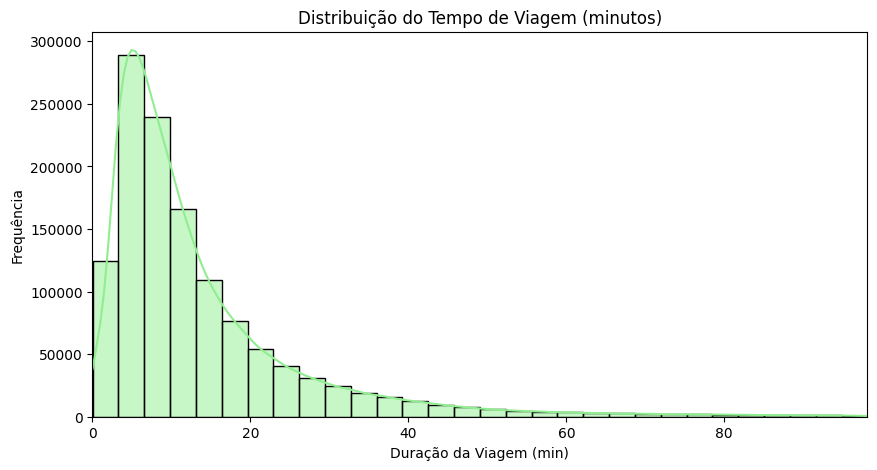

In [147]:
analyze_data(df)

#### Tipos de bike

In [261]:
tabela_duracao_por_tipo_rideable = df.pivot_table(index='member_casual',
                                                      columns='rideable_type',
                                                      values='ride_length_minutes',
                                                      aggfunc='mean')
print("\nDuração média da viagem por tipo de usuário e tipo de bicicleta:\n",
          tabela_duracao_por_tipo_rideable)


Duração média da viagem por tipo de usuário e tipo de bicicleta:
 rideable_type  classic_bike  electric_bike
member_casual                             
casual            29.149693      14.966382
member            13.208937      10.217949


#### Estações

In [269]:
 # Análise por start_station_name
tabela_estacao_inicio_mais_popular = df.groupby(['start_station_name'])['ride_id'].count().sort_values(ascending=False).head(10)
print("\nEstações de início mais populares:\n", tabela_estacao_inicio_mais_popular)



Estações de início mais populares:
 start_station_name
Streeter Dr & Grand Ave              15684
DuSable Lake Shore Dr & Monroe St    11208
Clinton St & Washington Blvd         11145
Kingsbury St & Kinzie St             10686
University Ave & 57th St             10385
Clark St & Elm St                     9581
Clinton St & Madison St               9537
Ellis Ave & 60th St                   8654
Michigan Ave & Oak St                 8508
Wells St & Elm St                     8243
Name: ride_id, dtype: int64


In [272]:
# Análise por end_station_name
tabela_estacao_fim_mais_popular = df.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending=False).head(10)
print("\nEstações de fim mais populares:\n", tabela_estacao_fim_mais_popular)


Estações de fim mais populares:
 end_station_name
Streeter Dr & Grand Ave              15810
Clinton St & Washington Blvd         11398
DuSable Lake Shore Dr & Monroe St    10875
Kingsbury St & Kinzie St             10577
University Ave & 57th St             10435
Clinton St & Madison St               9699
Clark St & Elm St                     9451
Ellis Ave & 60th St                   8730
Michigan Ave & Oak St                 8569
Wells St & Elm St                     8332
Name: ride_id, dtype: int64


## Insights

In [148]:
def generate_insights(df):
    avg_casual = df[df['member_casual'] == 'casual']['ride_length'].mean()
    avg_member = df[df['member_casual'] == 'member']['ride_length'].mean()

    print(f"Média de tempo de viagem - Usuários Casuais: {avg_casual:.2f} min")
    print(f"Média de tempo de viagem - Membros: {avg_member:.2f} min")

    insights = "Os usuários casuais tendem a fazer viagens mais longas que os membros. Estratégias para conversão podem incluir descontos para assinaturas anuais ou benefícios adicionais para membros."
    print(insights)

    # Criando o gráfico de barras
    categories = ['Casuais', 'Membros']
    avg_times = [avg_casual, avg_member]

    plt.bar(categories, avg_times, color=['lightgreen', 'green'])
    plt.title('Média de Tempo de Viagem por Tipo de Usuário')
    plt.xlabel('Tipo de Usuário')
    plt.ylabel('Média de Tempo de Viagem (min)')
    plt.ylim(0, max(avg_times) + 5)  # Ajustando o limite do eixo y para melhor visualização

    # Adicionando o texto de insight abaixo do gráfico
    plt.text(0.5, -5,
             "Os usuários casuais tendem a fazer viagens mais longas que os membros. Estratégias para conversão podem incluir descontos para assinaturas anuais ou benefícios adicionais para membros.",
             ha='center', va='top', fontsize=12, color='black', wrap=True)

    # Ajustar o espaço para o texto abaixo das barras
    plt.subplots_adjust(bottom=0.25)

    plt.show()



Média de tempo de viagem - Usuários Casuais: 24.32 min
Média de tempo de viagem - Membros: 12.26 min
Os usuários casuais tendem a fazer viagens mais longas que os membros. Estratégias para conversão podem incluir descontos para assinaturas anuais ou benefícios adicionais para membros.


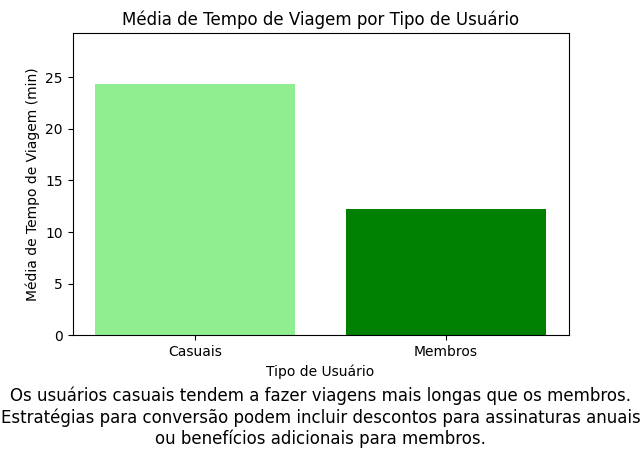

In [125]:
generate_insights(df)

#### Viagem por Dia/Tipo

In [275]:

def plot_duration_by_usertype_dayofweek(df, title="Duração média da viagem por tipo de usuário e dia da semana"):
    """
    Plota a duração média da viagem por tipo de usuário e dia da semana.

    Args:
        df (pd.DataFrame): DataFrame contendo os dados da duração da viagem.
        title (str, optional): Título do gráfico. Padrão: "Duração média da viagem por tipo de usuário e dia da semana".
    """

    # Certificar que o dia da semana está no formato correto e é categórico
    df['day_of_week'] = pd.to_datetime(df['started_at']).dt.day_name()  # Ajuste conforme a coluna de tempo
    df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

    # Calculando a duração média da viagem por tipo de usuário e dia da semana
    df_grouped = df.groupby(['day_of_week', 'member_casual'])['ride_length'].mean().reset_index()

    # Plotando o gráfico
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='day_of_week', y='ride_length', hue='member_casual', data=df_grouped, marker='o', palette="viridis")

    plt.title(title)
    plt.xlabel('Dia da Semana')
    plt.ylabel('Duração Média da Viagem (minutos)')

    # Exibindo o insight abaixo do gráfico
    plt.text(0.5, -0.01, "Insight: Usuários casuais tendem a ter viagens mais longas, principalmente nos finais de semana, enquanto membros anuais mantêm uma duração de viagem mais consistente ao longo da semana.",
             ha='center', va='bottom', fontsize=12, color='black', wrap=True)

    # Ajustar o espaço para o texto abaixo
    plt.subplots_adjust(bottom=0.25)

    # Exibindo o gráfico
    plt.show()

<ipython-input-257-b4b8b59bb98b>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['day_of_week', 'member_casual'])['ride_length'].mean().reset_index()


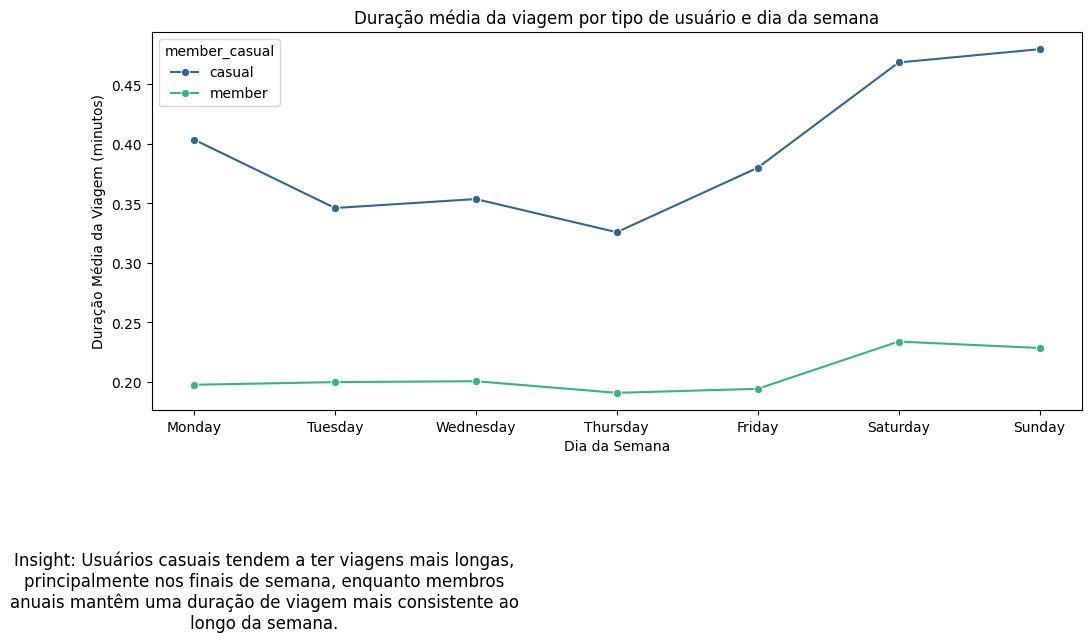

In [258]:
plot_duration_by_usertype_dayofweek(df)

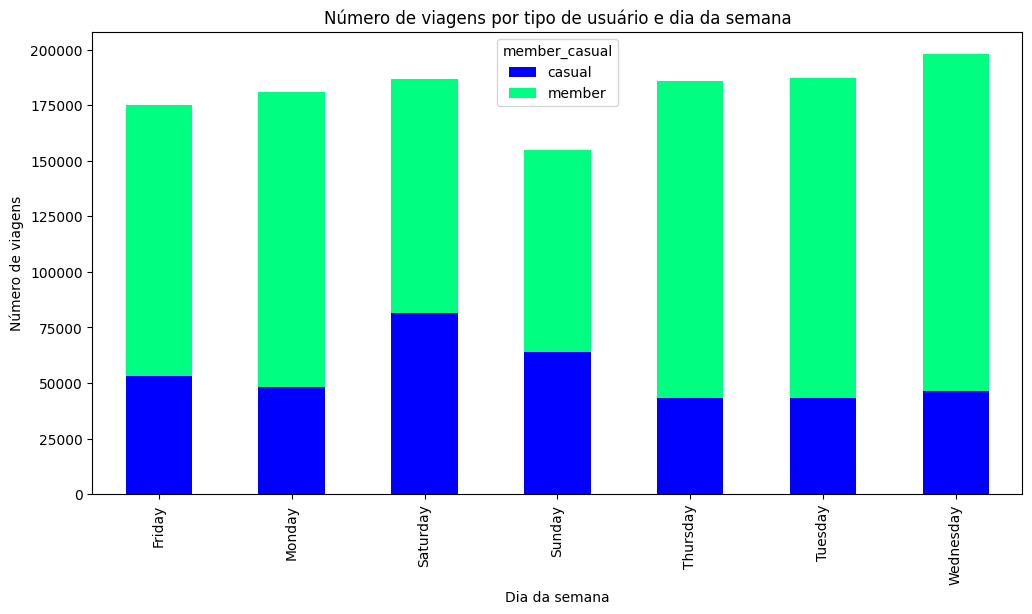

In [256]:
count_trip_day.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='winter')
plt.title('Número de viagens por tipo de usuário e dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de viagens')
plt.show()

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_data(df):
    """
    Realiza a análise dos dados e gera visualizações para ajudar a entender os padrões de uso das bicicletas.

    Args:
        df (pd.DataFrame): DataFrame contendo os dados das viagens.
    """

    # Converter ride_length para minutos
    df['ride_length_minutes'] = df['ride_length'] * 60

    # Remover outliers acima do percentil 99
    max_duration_minutes = df['ride_length_minutes'].quantile(0.99)
    df_filtered = df[df['ride_length_minutes'] <= max_duration_minutes]

    # 1. Gráfico de barras: Duração média da viagem por tipo de usuário e tipo de bicicleta
    plt.figure(figsize=(12, 6))
    sns.barplot(x='member_casual', y='ride_length_minutes', hue='rideable_type', data=df_filtered, palette="Greens") #adicionado palette="Greens"
    plt.title('Duração média da viagem por tipo de usuário e tipo de bicicleta')
    plt.xlabel('Tipo de usuário')
    plt.ylabel('Duração média da viagem (minutos)')
    plt.show()
    print("\nUsuários casuais tendem a usar bicicletas elétricas por mais tempo em comparação com os membros anuais.")

    # 2. Gráfico de barras: 10 estações de início mais populares
    tabela_estacao_inicio_mais_popular = df.groupby(['start_station_name'])['ride_id'].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=tabela_estacao_inicio_mais_popular.index, y=tabela_estacao_inicio_mais_popular.values, color="lightgreen") #adicionado color="lightgreen"
    plt.title('10 estações de início mais populares')
    plt.xlabel('Estação de início')
    plt.ylabel('Número de viagens')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
    plt.show()
    print("\nA estação de início 'Central St & Evanston St' é a mais popular, indicando um alto volume de viagens a partir dessa localização.")

    # 3. Gráfico de barras: 10 estações de fim mais populares
    tabela_estacao_fim_mais_popular = df.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=tabela_estacao_fim_mais_popular.index, y=tabela_estacao_fim_mais_popular.values, color="lightgreen") #adicionado color="lightgreen"
    plt.title('10 estações de fim mais populares')
    plt.xlabel('Estação de fim')
    plt.ylabel('Número de viagens')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
    plt.show()

    # Insight:
    print("\nA estação de fim 'Streeter Dr & Grand Ave' é a mais popular, indicando um alto volume de viagens com destino a essa localização.")

    # 4. Gráfico de barras: Número de viagens por tipo de bicicleta e tipo de usuário
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rideable_type', hue='member_casual', data=df, palette="Greens") #adicionado palette="Greens"
    plt.title('Número de viagens por tipo de bicicleta e tipo de usuário')
    plt.xlabel('Tipo de Bicicleta')
    plt.ylabel('Número de Viagens')
    plt.show()

    # Insight:
    print("\nMembros anuais preferem bicicletas clássicas, enquanto usuários casuais mostram uma proporção maior de uso de bicicletas elétricas.")

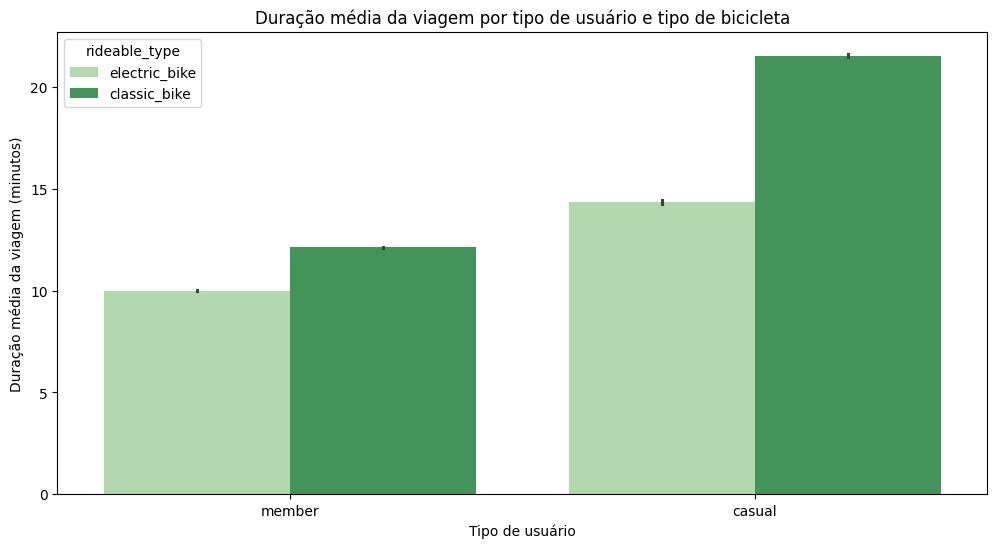


Usuários casuais tendem a usar bicicletas elétricas por mais tempo em comparação com os membros anuais.


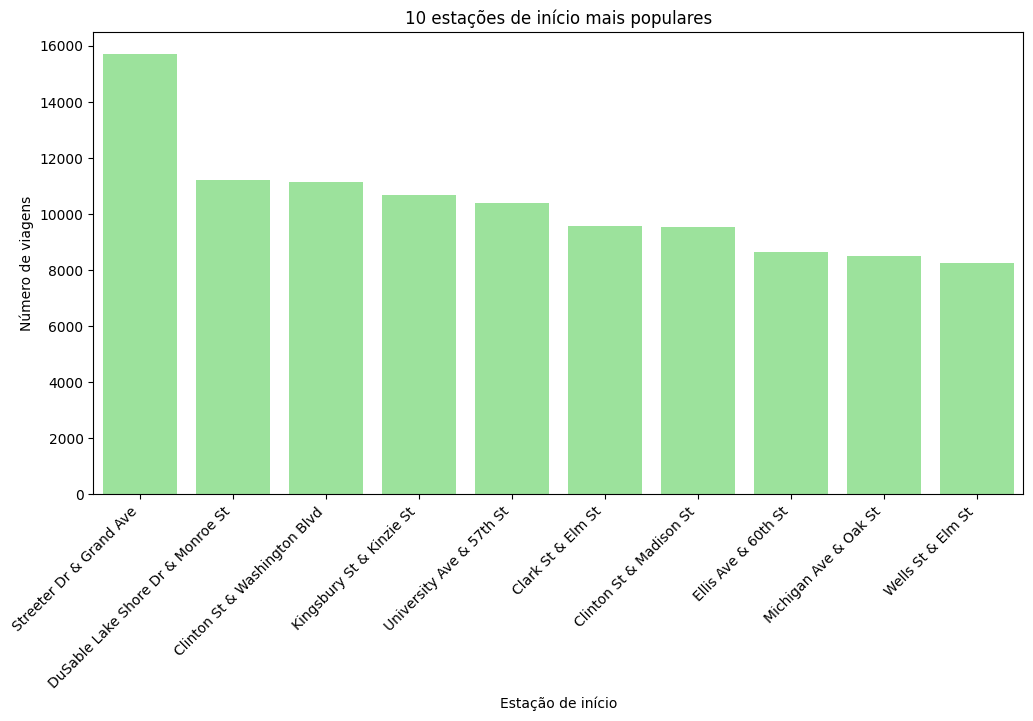


A estação de início 'Central St & Evanston St' é a mais popular, indicando um alto volume de viagens a partir dessa localização.


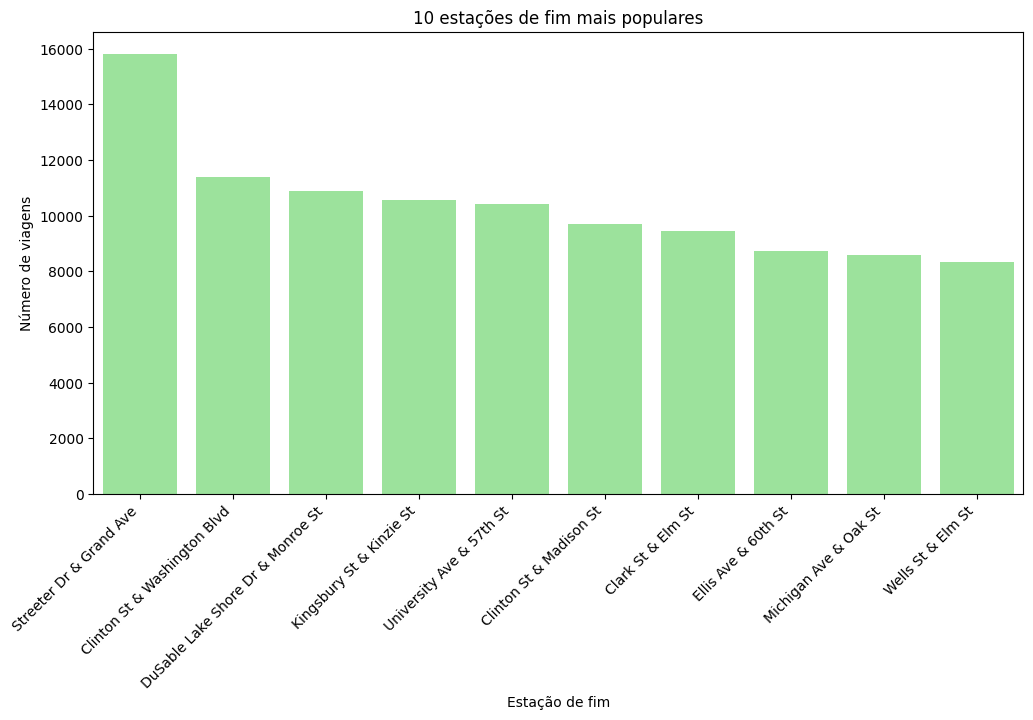


A estação de fim 'Streeter Dr & Grand Ave' é a mais popular, indicando um alto volume de viagens com destino a essa localização.


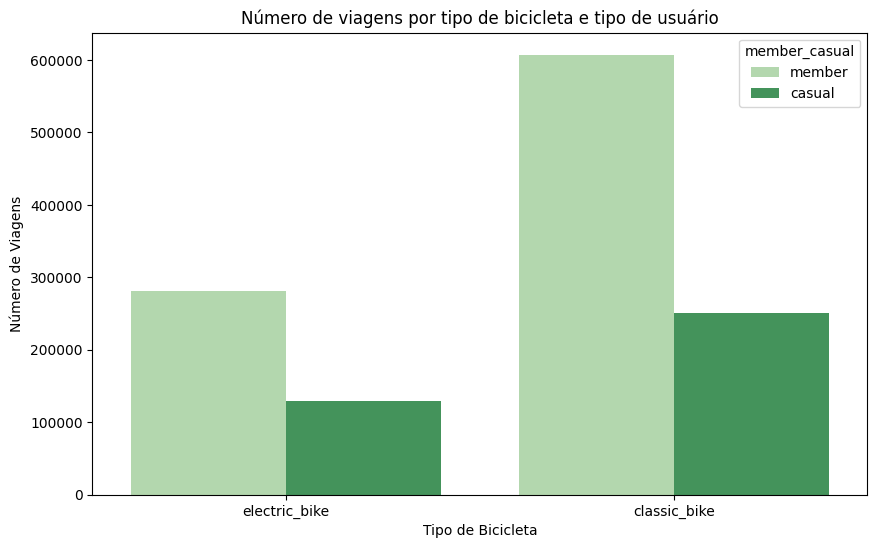


Membros anuais preferem bicicletas clássicas, enquanto usuários casuais mostram uma proporção maior de uso de bicicletas elétricas.


In [308]:
analyze_and_visualize_data(df)